In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('transactions.csv')

In [5]:

# Preprocessing
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['month'] = df['transaction_date'].dt.to_period('M')

In [6]:
# Aggregate by user
user_df = df.groupby('user_id').agg(
    total_spent = ('transaction_amount', 'sum'),
    avg_transaction = ('transaction_amount', 'mean'),
    transaction_count = ('transaction_amount', 'count'),
).reset_index()

In [7]:
# Pivot table: % spend by category
pivot = pd.pivot_table(df, index='user_id', columns='transaction_category',
                       values='transaction_amount', aggfunc='sum', fill_value=0)

pivot = pivot.div(pivot.sum(axis=1), axis=0)  # normalize to percentages

# Merge
final_df = user_df.merge(pivot, on='user_id')

# Standardize features
features = final_df.drop('user_id', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [8]:
# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

final_df['cluster'] = clusters

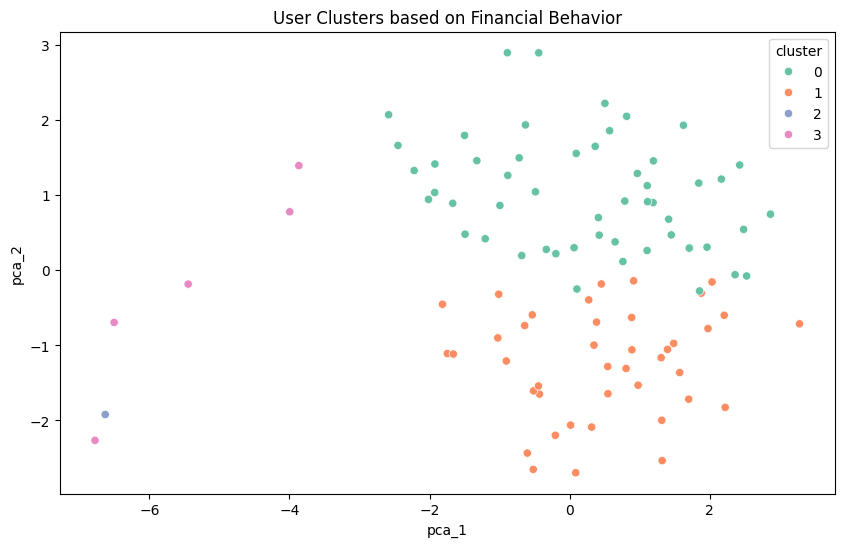

In [11]:
import os

# PCA for 2D visualization
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

final_df['pca_1'] = components[:,0]
final_df['pca_2'] = components[:,1]

plt.figure(figsize=(10,6))
sns.scatterplot(data=final_df, x='pca_1', y='pca_2', hue='cluster', palette='Set2')
plt.title('User Clusters based on Financial Behavior')

# Make sure the visuals directory exists
os.makedirs('../visuals', exist_ok=True)

# Save the figure
plt.savefig('../visuals/cluster_plot.png')
plt.show()


In [12]:
# Cluster-wise description
for c in final_df['cluster'].unique():
    print(f"\nCluster {c} summary:")
    display(final_df[final_df['cluster'] == c].describe())


Cluster 0 summary:


,user_id,total_spent,avg_transaction,transaction_count,Dining,Entertainment,Grocery,Investment,Rent,Travel,Utilities,cluster,pca_1,pca_2
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.0,53.000000,53.000000
mean,51.641509,4254.446604,345.184040,12.264151,0.030562,0.026393,0.070331,0.150162,0.351974,0.326621,0.043956,0.0,0.266184,1.004765
std,28.645106,1592.045468,95.626096,2.975224,0.025911,0.027202,0.051496,0.107389,0.219022,0.201949,0.038065,0.0,1.464093,0.749318
min,1.000000,1237.930000,159.315385,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-2.584154,-0.274535
25%,32.000000,3217.370000,272.609167,11.000000,0.013339,0.000000,0.032309,0.081447,0.239672,0.177267,0.023940,0.0,-0.882122,0.379531
50%,54.000000,4298.380000,353.988000,13.000000,0.024244,0.019620,0.061314,0.141686,0.351981,0.339197,0.032385,0.0,0.423397,0.923307
75%,77.000000,5421.210000,417.284000,15.000000,0.044001,0.039409,0.108580,0.205201,0.526542,0.455516,0.055116,0.0,1.414807,1.460880
max,98.000000,7551.490000,516.639167,15.000000,0.099010,0.112886,0.189578,0.499697,0.769027,0.732573,0.192581,0.0,2.869216,2.899477



Cluster 1 summary:


,user_id,total_spent,avg_transaction,transaction_count,Dining,Entertainment,Grocery,Investment,Rent,Travel,Utilities,cluster,pca_1,pca_2
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.0,41.000000,41.000000
mean,49.756098,3120.728537,385.511081,8.170732,0.037415,0.028146,0.048012,0.066395,0.661758,0.107351,0.050923,1.0,0.466161,-1.228463
std,29.771446,1256.587588,103.855537,2.458683,0.030999,0.029661,0.050606,0.073529,0.122923,0.128254,0.044361,0.0,1.196708,0.716021
min,2.000000,1453.430000,194.530000,5.000000,0.000000,0.000000,0.000000,0.000000,0.379706,0.000000,0.000000,1.0,-1.814919,-2.695959
25%,22.000000,2181.050000,313.098333,6.000000,0.017417,0.000000,0.000000,0.000000,0.583701,0.000000,0.018386,1.0,-0.514828,-1.648355
50%,49.000000,2845.960000,392.551429,8.000000,0.030362,0.021879,0.026109,0.067683,0.671437,0.079488,0.037262,1.0,0.453114,-1.115016
75%,73.000000,3631.390000,453.923750,10.000000,0.055607,0.044904,0.082761,0.115378,0.745245,0.186786,0.084345,1.0,1.322058,-0.689317
max,100.000000,6983.980000,629.198000,14.000000,0.123711,0.114599,0.165375,0.254307,0.892585,0.502207,0.144571,1.0,3.284069,-0.139684



Cluster 2 summary:


,user_id,total_spent,avg_transaction,transaction_count,Dining,Entertainment,Grocery,Investment,Rent,Travel,Utilities,cluster,pca_1,pca_2
count,1.0,1.00,1.000000,1.0,1.000000,1.00000,1.000000,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000
mean,20.0,656.36,109.393333,6.0,0.284752,0.12353,0.591718,0.0,0.0,0.0,0.0,2.0,-6.630787,-1.920409
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,20.0,656.36,109.393333,6.0,0.284752,0.12353,0.591718,0.0,0.0,0.0,0.0,2.0,-6.630787,-1.920409
25%,20.0,656.36,109.393333,6.0,0.284752,0.12353,0.591718,0.0,0.0,0.0,0.0,2.0,-6.630787,-1.920409
50%,20.0,656.36,109.393333,6.0,0.284752,0.12353,0.591718,0.0,0.0,0.0,0.0,2.0,-6.630787,-1.920409
75%,20.0,656.36,109.393333,6.0,0.284752,0.12353,0.591718,0.0,0.0,0.0,0.0,2.0,-6.630787,-1.920409
max,20.0,656.36,109.393333,6.0,0.284752,0.12353,0.591718,0.0,0.0,0.0,0.0,2.0,-6.630787,-1.920409



Cluster 3 summary:


,user_id,total_spent,avg_transaction,transaction_count,Dining,Entertainment,Grocery,Investment,Rent,Travel,Utilities,cluster,pca_1,pca_2
count,5.0000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.0,5.000000,5.000000,5.0,5.000000,5.000000
mean,50.6000,1099.256000,132.551612,8.00000,0.127683,0.177205,0.142213,0.206434,0.0,0.145730,0.200734,3.0,-5.317917,-0.193035
std,32.3311,484.433057,24.875227,2.44949,0.082385,0.044013,0.135506,0.238867,0.0,0.200396,0.120547,0.0,1.360764,1.415627
min,25.0000,558.610000,104.853333,5.00000,0.051422,0.139256,0.000000,0.000000,0.0,0.000000,0.085689,3.0,-6.776814,-2.264884
25%,28.0000,629.120000,111.722000,6.00000,0.070222,0.141588,0.089539,0.000000,0.0,0.000000,0.113428,3.0,-6.503945,-0.693755
50%,29.0000,1209.170000,134.352222,9.00000,0.120066,0.160374,0.107009,0.157666,0.0,0.000000,0.159445,3.0,-5.446636,-0.183116
75%,78.0000,1488.400000,146.452727,9.00000,0.135165,0.204090,0.150632,0.306739,0.0,0.338298,0.268316,3.0,-3.996493,0.780849
max,93.0000,1610.980000,165.377778,11.00000,0.261540,0.240717,0.363885,0.567766,0.0,0.390352,0.376792,3.0,-3.865696,1.395730


In [17]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pickle

# Example: Simulated Data
data = {
    'total_spent': [1200, 500, 800, 300, 1500, 700],
    'avg_transaction': [150, 70, 120, 50, 160, 90],
    'transaction_count': [8, 10, 6, 4, 12, 7],
    'rent_pct': [0.5, 0.4, 0.6, 0.3, 0.7, 0.5],
    'grocery_pct': [0.2, 0.3, 0.15, 0.1, 0.1, 0.25],
    'entertainment_pct': [0.1, 0.2, 0.05, 0.1, 0.1, 0.05]
}

df = pd.DataFrame(data)

# Features for clustering (all columns except 'user_id' if applicable)
X = df.drop(columns=['total_spent'])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the KMeans model
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# Save the trained model and scaler as .pkl files
with open('kmeans_model.pkl', 'wb') as model_file:
    pickle.dump(kmeans, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("KMeans model and scaler saved successfully!")


KMeans model and scaler saved successfully!


In [18]:
import pickle

# Load models and scaler
with open('kmeans_model.pkl', 'rb') as model_file:
    kmeans_model = pickle.load(model_file)

with open('scaler.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

# You can now use the model and scaler to make predictions as needed

In [19]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pickle

# Sample Data (You can replace this with your actual dataset)
data = {
    'total_spent': [1200, 500, 800, 300, 1500, 700],
    'avg_transaction': [150, 70, 120, 50, 160, 90],
    'transaction_count': [8, 10, 6, 4, 12, 7],
    'rent_pct': [0.5, 0.4, 0.6, 0.3, 0.7, 0.5],
    'grocery_pct': [0.2, 0.3, 0.15, 0.1, 0.1, 0.25],
    'entertainment_pct': [0.1, 0.2, 0.05, 0.1, 0.1, 0.05]
}

# Create DataFrame
df = pd.DataFrame(data)

# Features for clustering (all columns except 'total_spent')
X = df.drop(columns=['total_spent'])

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the KMeans model (with 4 clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# Save the KMeans model as a pickle file
with open('kmeans_model.pkl', 'wb') as model_file:
    pickle.dump(kmeans, model_file)

# Save the StandardScaler as a pickle file
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("kmeans_model.pkl and scaler.pkl have been saved successfully!")


kmeans_model.pkl and scaler.pkl have been saved successfully!


In [21]:
import pickle

# Load the KMeans model and scaler
with open('kmeans_model.pkl', 'rb') as model_file:
    kmeans_model = pickle.load(model_file)

with open('scaler.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

# Example: Use them to make predictions for a new input
new_data = [[150, 8, 0.5, 0.2, 0.1]]  # Excluding 'total_spent', only 5 features
scaled_data = scaler.transform(new_data)
cluster = kmeans_model.predict(scaled_data)

print(f"Predicted cluster: {cluster[0]}")


Predicted cluster: 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [22]:
!pip install streamlit

In [23]:
# Save the Streamlit app code as app.py
app_code = """
import streamlit as st
import pandas as pd
import pickle

# Load models and data
model = pickle.load(open('kmeans_model.pkl', 'rb'))
scaler = pickle.load(open('scaler.pkl', 'rb'))

st.title('🧠 Financial Behavior Cluster Predictor')

st.header('Enter Your Finance Info:')
total_spent = st.number_input('Total Spent Last Month ($)', min_value=0)
avg_transaction = st.number_input('Average Transaction Amount ($)', min_value=0)
transaction_count = st.number_input('Number of Transactions', min_value=0)
rent_pct = st.slider('Rent Spend %', 0.0, 1.0)
grocery_pct = st.slider('Grocery Spend %', 0.0, 1.0)
entertainment_pct = st.slider('Entertainment Spend %', 0.0, 1.0)

# Prediction
if st.button('Predict My Cluster'):
    X = scaler.transform([[total_spent, avg_transaction, transaction_count, rent_pct, grocery_pct, entertainment_pct]])
    cluster = model.predict(X)
    st.success(f'You belong to Cluster {cluster[0]}!')
"""

with open('app.py', 'w') as f:
    f.write(app_code)


In [25]:
import streamlit as st
import pandas as pd
import pickle

# Load models and data
model = pickle.load(open('kmeans_model.pkl', 'rb'))
scaler = pickle.load(open('scaler.pkl', 'rb'))

st.title('🧠 Financial Behavior Cluster Predictor')

st.header('Enter Your Finance Info:')
total_spent = st.number_input('Total Spent Last Month ($)', min_value=0)
avg_transaction = st.number_input('Average Transaction Amount ($)', min_value=0)
transaction_count = st.number_input('Number of Transactions', min_value=0)
rent_pct = st.slider('Rent Spend %', 0.0, 1.0)
grocery_pct = st.slider('Grocery Spend %', 0.0, 1.0)
entertainment_pct = st.slider('Entertainment Spend %', 0.0, 1.0)

# Prediction
if st.button('Predict My Cluster'):
    X = scaler.transform([[total_spent, avg_transaction, transaction_count, rent_pct, grocery_pct, entertainment_pct]])
    cluster = model.predict(X)
    st.success(f'You belong to Cluster {cluster[0]}!')


2025-04-27 17:54:08.143 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 17:54:08.268 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-04-27 17:54:08.270 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 17:54:08.271 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 17:54:08.272 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 17:54:08.273 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 17:54:08.274 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 17:54:08.276 Thread 'MainThread': mi